# Solutions

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('../../ch_05/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

## Exercise 1
Plot the rolling 20-day (trading days) minimum of the Facebook closing price with the pandas `plot()` method.

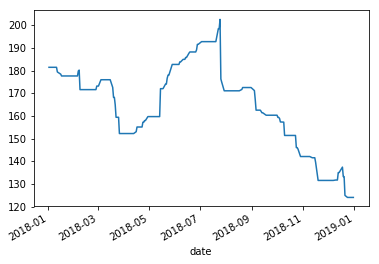

In [2]:
fb.close.rolling('20D').min().plot()

## Exercise 2
Create a histogram and KDE of the change from open to close in the price of Facebook stock.

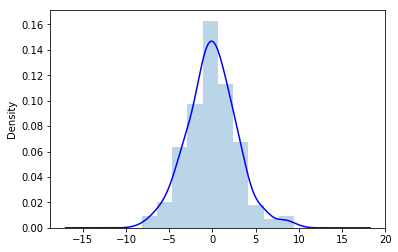

In [3]:
series = fb.assign(differential=fb.open - fb.close).differential
ax = series.plot(kind='hist', density=True, alpha=0.3)
series.plot(kind='kde', color='blue', ax=ax)

## Exercise 3
Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook.

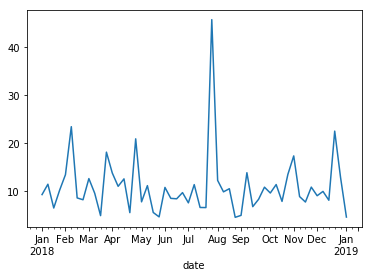

In [4]:
fb.resample('1W').agg(
    dict(high='max', low='min')
).assign(
    max_change_weekly=lambda x: x.high - x.low
).max_change_weekly.plot()

## Exercise 4
Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
1. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review last chapter's time series section for an easy way to do this).
2. The second subplot will be a bar plot showing the net effect this had monthly.
3. Bonus 1: Color the bars by whether they are gains in the stock price (green) or drops in the stock price (red).
4. Bonus 2: Modify the x axis of the bar plot to show the three-letter abbreviation for the month.

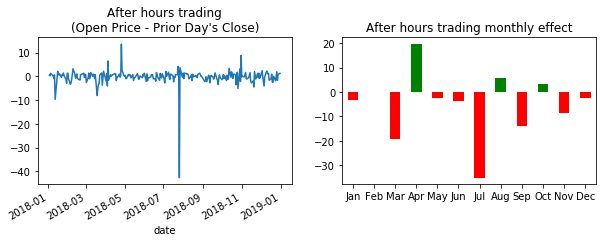

In [5]:
series = (fb.open - fb.close.shift())
monthly_effect = series.resample('1M').sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

series.plot(
    ax=axes[0],
    title='After hours trading\n(Open Price - Prior Day\'s Close)'
)

monthly_effect.index = monthly_effect.index.strftime('%b')
monthly_effect.plot(
    ax=axes[1],
    kind='bar', 
    title='After hours trading monthly effect',
    color=np.where(monthly_effect >= 0, 'g', 'r'),
    rot=0
)